# Kaggle's Playground Series : Predict CO2 Emission in Rwanda

---

**Title:** Prediction of CO2 Emissions in Rwanda Using ForeCasting Model

---

## Calling the Libraries and Importing the Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train_df = pd.read_csv('C:/Users/mahbu/Downloads/Kaggle CO2 Emission/train.csv')
test_df = pd.read_csv('C:/Users/mahbu/Downloads/Kaggle CO2 Emission/test.csv')

In [2]:
train_df

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.510,29.290,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,ID_-3.299_30.301_2021_48,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,...,5459.185355,60657.101913,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214,29.404171
79019,ID_-3.299_30.301_2021_49,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,...,5606.449457,60168.191528,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469,29.186497
79020,ID_-3.299_30.301_2021_50,-3.299,30.301,2021,50,NaN,NaN,NaN,NaN,NaN,...,6222.646776,56596.027209,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166,29.131205
79021,ID_-3.299_30.301_2021_51,-3.299,30.301,2021,51,-0.000034,0.879397,-0.000028,0.184209,-100.344827,...,7896.456885,46533.348194,6946.858022,32.594768,0.274047,8.427699,48.295652,-139.447849,29.112868,28.125792


In [3]:
test_df

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2022_00,-0.510,29.290,2022,0,NaN,NaN,NaN,NaN,NaN,...,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,ID_-0.510_29.290_2022_01,-0.510,29.290,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,...,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,ID_-0.510_29.290_2022_02,-0.510,29.290,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,...,34133.080469,8984.795703,39006.093750,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361
3,ID_-0.510_29.290_2022_03,-0.510,29.290,2022,3,0.000350,0.696917,0.000243,0.201028,72.169566,...,50854.991076,6014.724059,57646.368368,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774
4,ID_-0.510_29.290_2022_04,-0.510,29.290,2022,4,-0.000317,0.580527,-0.000184,0.204352,76.190865,...,46594.685145,6849.280477,52896.541873,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24348,ID_-3.299_30.301_2022_44,-3.299,30.301,2022,44,-0.000618,0.745549,-0.000461,0.234492,72.306198,...,48839.430415,6260.120033,55483.459980,5260.120056,30.398508,0.180046,-25.528588,45.284576,-116.521412,29.992562
24349,ID_-3.299_30.301_2022_45,-3.299,30.301,2022,45,NaN,NaN,NaN,NaN,NaN,...,47042.694849,6678.843299,53589.917383,5678.951521,19.223844,0.177833,-13.380005,43.770351,-122.405759,29.017975
24350,ID_-3.299_30.301_2022_46,-3.299,30.301,2022,46,NaN,NaN,NaN,NaN,NaN,...,55337.148173,5336.282475,62646.761340,4336.282491,13.801194,0.219471,-5.072065,33.226455,-124.530639,30.187472
24351,ID_-3.299_30.301_2022_47,-3.299,30.301,2022,47,0.000071,1.003805,0.000077,0.205077,74.327427,...,44813.691428,7188.578533,50728.313991,6188.578464,27.887489,0.247275,-0.668714,45.885617,-129.006797,30.427455


Since we have to predict the data upto week 48 in 2022, hence we will take only the data from week 0 to week 48 in the previous 3 years 2019, 2020 and 2021.

## Filtering the Training Dataset

In [4]:
train_cal = train_df[train_df['week_no']<49]
train_cal

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.510,29.290,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79014,ID_-3.299_30.301_2021_44,-3.299,30.301,2021,44,0.000208,1.052408,0.000219,0.291622,73.352676,...,6281.308591,55212.543929,5281.308561,15.665847,0.237534,-12.664572,41.934605,-116.859869,30.025270,29.346270
79015,ID_-3.299_30.301_2021_45,-3.299,30.301,2021,45,0.000052,1.269693,0.000039,0.181516,15.949333,...,6501.621501,53669.020182,5540.476440,11.785916,0.258390,15.871606,54.069416,-124.565759,28.268044,29.688602
79016,ID_-3.299_30.301_2021_46,-3.299,30.301,2021,46,-0.000084,1.171241,-0.000111,0.193786,-12.543335,...,5339.591590,61586.797796,4370.493122,13.430236,0.256345,-61.977057,25.850881,-123.079127,31.710412,29.701365
79017,ID_-3.299_30.301_2021_47,-3.299,30.301,2021,47,-0.000257,0.668691,-0.000172,0.257957,71.891731,...,6894.667968,53218.918203,5894.667968,25.124038,0.308299,24.648991,38.736509,-129.933645,29.499534,30.297634


## Finding Out the Unique Location Value 

We will find now find out the Unique Location Value combining each of the ```week_no , latitude and longitude```.

In [5]:
train_cal.insert(loc=3,column='unique_loc_value',value=0)
test_df.insert(loc=3,column='unique_loc_value',value=0)

In [6]:
train_cal.loc[:,'unique_loc_value'] = (
                                       (train_cal.loc[:,'latitude']*-1)*(train_cal.loc[:,'longitude'])*
                                       (train_cal.loc[:,'week_no']+3)
                                      )

test_df.loc[:,'unique_loc_value']  = (
                                    (test_df.loc[:,'latitude']*-1)*(test_df.loc[:,'longitude'])*
                                    (test_df.loc[:,'week_no']+3)
                                  )
unique_loc_train = train_cal['unique_loc_value'].unique()
unique_loc_test = test_df['unique_loc_value'].unique()

In [7]:
train_cal

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,unique_loc_value,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.510,29.290,44.813700,2019,0,-0.000108,0.603019,-0.000065,0.255668,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.510,29.290,59.751600,2019,1,0.000021,0.728214,0.000014,0.130988,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.510,29.290,74.689500,2019,2,0.000514,0.748199,0.000385,0.110018,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.510,29.290,89.627400,2019,3,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.510,29.290,104.565300,2019,4,-0.000079,0.676296,-0.000048,0.121164,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79014,ID_-3.299_30.301_2021_44,-3.299,30.301,4698.260953,2021,44,0.000208,1.052408,0.000219,0.291622,...,6281.308591,55212.543929,5281.308561,15.665847,0.237534,-12.664572,41.934605,-116.859869,30.025270,29.346270
79015,ID_-3.299_30.301_2021_45,-3.299,30.301,4798.223952,2021,45,0.000052,1.269693,0.000039,0.181516,...,6501.621501,53669.020182,5540.476440,11.785916,0.258390,15.871606,54.069416,-124.565759,28.268044,29.688602
79016,ID_-3.299_30.301_2021_46,-3.299,30.301,4898.186951,2021,46,-0.000084,1.171241,-0.000111,0.193786,...,5339.591590,61586.797796,4370.493122,13.430236,0.256345,-61.977057,25.850881,-123.079127,31.710412,29.701365
79017,ID_-3.299_30.301_2021_47,-3.299,30.301,4998.149950,2021,47,-0.000257,0.668691,-0.000172,0.257957,...,6894.667968,53218.918203,5894.667968,25.124038,0.308299,24.648991,38.736509,-129.933645,29.499534,30.297634


In [8]:
test_df

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,unique_loc_value,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2022_00,-0.510,29.290,44.813700,2022,0,NaN,NaN,NaN,NaN,...,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,ID_-0.510_29.290_2022_01,-0.510,29.290,59.751600,2022,1,0.000456,0.691164,0.000316,0.000000,...,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,ID_-0.510_29.290_2022_02,-0.510,29.290,74.689500,2022,2,0.000161,0.605107,0.000106,0.079870,...,34133.080469,8984.795703,39006.093750,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361
3,ID_-0.510_29.290_2022_03,-0.510,29.290,89.627400,2022,3,0.000350,0.696917,0.000243,0.201028,...,50854.991076,6014.724059,57646.368368,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774
4,ID_-0.510_29.290_2022_04,-0.510,29.290,104.565300,2022,4,-0.000317,0.580527,-0.000184,0.204352,...,46594.685145,6849.280477,52896.541873,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24348,ID_-3.299_30.301_2022_44,-3.299,30.301,4698.260953,2022,44,-0.000618,0.745549,-0.000461,0.234492,...,48839.430415,6260.120033,55483.459980,5260.120056,30.398508,0.180046,-25.528588,45.284576,-116.521412,29.992562
24349,ID_-3.299_30.301_2022_45,-3.299,30.301,4798.223952,2022,45,NaN,NaN,NaN,NaN,...,47042.694849,6678.843299,53589.917383,5678.951521,19.223844,0.177833,-13.380005,43.770351,-122.405759,29.017975
24350,ID_-3.299_30.301_2022_46,-3.299,30.301,4898.186951,2022,46,NaN,NaN,NaN,NaN,...,55337.148173,5336.282475,62646.761340,4336.282491,13.801194,0.219471,-5.072065,33.226455,-124.530639,30.187472
24351,ID_-3.299_30.301_2022_47,-3.299,30.301,4998.149950,2022,47,0.000071,1.003805,0.000077,0.205077,...,44813.691428,7188.578533,50728.313991,6188.578464,27.887489,0.247275,-0.668714,45.885617,-129.006797,30.427455


In [9]:
# to check its uniqueness
print(f'Training Dataset Unique Location Feature: {unique_loc_train}')
print(f'Length: {len(unique_loc_train)}\n')

print(f'Test Dataset Unique Location Feature: {unique_loc_test}')
print(f'Length: {len(unique_loc_test)}\n')

print(unique_loc_test==unique_loc_train)


Training Dataset Unique Location Feature: [  44.8137     59.7516     74.6895   ... 4898.186951 4998.14995
 5098.112949]
Length: 24353

Test Dataset Unique Location Feature: [  44.8137     59.7516     74.6895   ... 4898.186951 4998.14995
 5098.112949]
Length: 24353

[ True  True  True ...  True  True  True]


## Creating the Year Dataset

In [10]:
df_2019 = train_cal[train_cal['year']==2019]
df_2019.reset_index(drop=True)       

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,unique_loc_value,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.510,29.290,44.813700,2019,0,-0.000108,0.603019,-0.000065,0.255668,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.510,29.290,59.751600,2019,1,0.000021,0.728214,0.000014,0.130988,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.510,29.290,74.689500,2019,2,0.000514,0.748199,0.000385,0.110018,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.510,29.290,89.627400,2019,3,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.510,29.290,104.565300,2019,4,-0.000079,0.676296,-0.000048,0.121164,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24348,ID_-3.299_30.301_2019_44,-3.299,30.301,4698.260953,2019,44,-0.000037,1.124936,-0.000041,0.180320,...,3989.519812,71239.028734,3031.366785,18.714125,0.269761,-24.850227,41.989949,-117.727154,31.103540,30.327420
24349,ID_-3.299_30.301_2019_45,-3.299,30.301,4798.223952,2019,45,0.000046,1.488261,0.000069,0.181814,...,4629.361687,68139.932098,3629.361659,13.957440,0.295420,-61.190843,17.910110,-120.717642,30.427665,30.811167
24350,ID_-3.299_30.301_2019_46,-3.299,30.301,4898.186951,2019,46,NaN,NaN,NaN,NaN,...,8163.432441,42852.246112,7163.432343,47.242508,0.277157,38.666802,54.154628,-131.769412,26.913163,31.162886
24351,ID_-3.299_30.301_2019_47,-3.299,30.301,4998.149950,2019,47,-0.000443,0.455346,-0.000202,0.274103,...,7657.025818,46154.049316,6657.025726,47.311978,0.270970,-56.180608,43.026570,-125.478366,34.092927,31.439606


In [11]:
df_2020 = train_cal[train_cal['year']==2020]
df_2020.reset_index(drop=True)

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,unique_loc_value,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2020_00,-0.510,29.290,44.813700,2020,0,0.000064,0.970290,0.000073,0.163462,...,5388.602054,60747.063530,4638.602176,6.287709,0.283116,-13.291375,33.679610,-140.309173,30.053447,3.753601
1,ID_-0.510_29.290_2020_01,-0.510,29.290,59.751600,2020,1,NaN,NaN,NaN,NaN,...,6361.488754,53750.174162,5361.488754,19.167269,0.317732,-30.474972,48.119754,-139.437777,30.391957,4.051966
2,ID_-0.510_29.290_2020_02,-0.510,29.290,74.689500,2020,2,-0.000361,0.668526,-0.000231,0.086199,...,5320.715902,61012.625000,4320.715861,48.203733,0.265554,-12.461150,35.809728,-137.854449,29.100415,4.154116
3,ID_-0.510_29.290_2020_03,-0.510,29.290,89.627400,2020,3,0.000597,0.553729,0.000331,0.149257,...,6219.319294,55704.782998,5219.319269,12.809350,0.267030,16.381079,35.836898,-139.017754,26.265561,4.165751
4,ID_-0.510_29.290_2020_04,-0.510,29.290,104.565300,2020,4,0.000107,1.045238,0.000112,0.224283,...,6348.560006,54829.331776,5348.560014,35.283981,0.268983,-12.193650,47.092968,-134.474279,27.061321,4.233635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24348,ID_-3.299_30.301_2020_44,-3.299,30.301,4698.260953,2020,44,0.000127,0.921760,0.000119,0.230049,...,5818.357144,57973.681567,4818.357179,6.918414,0.286199,-0.381158,35.092669,-119.004225,28.531373,26.502530
24349,ID_-3.299_30.301_2020_45,-3.299,30.301,4798.223952,2020,45,0.000131,0.996718,0.000131,0.257779,...,6963.545666,50665.534539,5963.545673,41.860118,0.300858,15.602750,42.502600,-124.831989,27.773162,26.646906
24350,ID_-3.299_30.301_2020_46,-3.299,30.301,4898.186951,2020,46,NaN,NaN,NaN,NaN,...,7455.347635,48342.692606,6455.347620,39.778609,0.311948,-12.999406,48.147550,-126.912817,30.689522,26.892382
24351,ID_-3.299_30.301_2020_47,-3.299,30.301,4998.149950,2020,47,-0.000153,0.895948,-0.000137,0.000000,...,6532.487556,55838.261622,5540.928585,36.002009,0.270903,-25.383718,35.005619,-127.737689,31.611529,27.644840


In [12]:
df_2021 = train_cal[train_cal['year']==2021]
df_2021.reset_index(drop=True)

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,unique_loc_value,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2021_00,-0.510,29.290,44.813700,2021,0,NaN,NaN,NaN,NaN,...,8158.284912,43203.886719,7158.284912,13.620904,0.348412,-12.744946,60.345203,-140.402161,31.679763,3.319557
1,ID_-0.510_29.290_2021_01,-0.510,29.290,59.751600,2021,1,7.495098e-07,0.721342,0.000010,0.165762,...,6981.121528,51989.007713,5989.078450,10.850882,0.313980,-30.843282,31.586801,-139.236763,29.954494,3.971814
2,ID_-0.510_29.290_2021_02,-0.510,29.290,74.689500,2021,2,NaN,NaN,NaN,NaN,...,7173.032543,50188.757560,6173.032512,27.395111,0.317191,25.002771,36.570795,-141.058642,27.967284,4.030769
3,ID_-0.510_29.290_2021_03,-0.510,29.290,89.627400,2021,3,1.310551e-04,0.637843,0.000083,0.156940,...,6877.751950,52262.934955,5877.751938,8.236867,0.283179,-13.112604,42.558191,-138.909736,27.505410,4.083173
4,ID_-0.510_29.290_2021_04,-0.510,29.290,104.565300,2021,4,-8.852908e-06,0.766009,-0.000020,0.116832,...,5616.146900,59267.038012,4707.660364,7.747805,0.268286,-65.206115,45.831876,-132.634760,28.215139,4.161754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24348,ID_-3.299_30.301_2021_44,-3.299,30.301,4698.260953,2021,44,2.081706e-04,1.052408,0.000219,0.291622,...,6281.308591,55212.543929,5281.308561,15.665847,0.237534,-12.664572,41.934605,-116.859869,30.025270,29.346270
24349,ID_-3.299_30.301_2021_45,-3.299,30.301,4798.223952,2021,45,5.161674e-05,1.269693,0.000039,0.181516,...,6501.621501,53669.020182,5540.476440,11.785916,0.258390,15.871606,54.069416,-124.565759,28.268044,29.688602
24350,ID_-3.299_30.301_2021_46,-3.299,30.301,4898.186951,2021,46,-8.420468e-05,1.171241,-0.000111,0.193786,...,5339.591590,61586.797796,4370.493122,13.430236,0.256345,-61.977057,25.850881,-123.079127,31.710412,29.701365
24351,ID_-3.299_30.301_2021_47,-3.299,30.301,4998.149950,2021,47,-2.571320e-04,0.668691,-0.000172,0.257957,...,6894.667968,53218.918203,5894.667968,25.124038,0.308299,24.648991,38.736509,-129.933645,29.499534,30.297634


In [13]:
test_df

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,unique_loc_value,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2022_00,-0.510,29.290,44.813700,2022,0,NaN,NaN,NaN,NaN,...,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,ID_-0.510_29.290_2022_01,-0.510,29.290,59.751600,2022,1,0.000456,0.691164,0.000316,0.000000,...,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,ID_-0.510_29.290_2022_02,-0.510,29.290,74.689500,2022,2,0.000161,0.605107,0.000106,0.079870,...,34133.080469,8984.795703,39006.093750,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361
3,ID_-0.510_29.290_2022_03,-0.510,29.290,89.627400,2022,3,0.000350,0.696917,0.000243,0.201028,...,50854.991076,6014.724059,57646.368368,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774
4,ID_-0.510_29.290_2022_04,-0.510,29.290,104.565300,2022,4,-0.000317,0.580527,-0.000184,0.204352,...,46594.685145,6849.280477,52896.541873,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24348,ID_-3.299_30.301_2022_44,-3.299,30.301,4698.260953,2022,44,-0.000618,0.745549,-0.000461,0.234492,...,48839.430415,6260.120033,55483.459980,5260.120056,30.398508,0.180046,-25.528588,45.284576,-116.521412,29.992562
24349,ID_-3.299_30.301_2022_45,-3.299,30.301,4798.223952,2022,45,NaN,NaN,NaN,NaN,...,47042.694849,6678.843299,53589.917383,5678.951521,19.223844,0.177833,-13.380005,43.770351,-122.405759,29.017975
24350,ID_-3.299_30.301_2022_46,-3.299,30.301,4898.186951,2022,46,NaN,NaN,NaN,NaN,...,55337.148173,5336.282475,62646.761340,4336.282491,13.801194,0.219471,-5.072065,33.226455,-124.530639,30.187472
24351,ID_-3.299_30.301_2022_47,-3.299,30.301,4998.149950,2022,47,0.000071,1.003805,0.000077,0.205077,...,44813.691428,7188.578533,50728.313991,6188.578464,27.887489,0.247275,-0.668714,45.885617,-129.006797,30.427455


# Creating Submit Dataset and Forecasting

In [14]:
submit_df = test_df[['ID_LAT_LON_YEAR_WEEK','unique_loc_value']] 
submit_df

,ID_LAT_LON_YEAR_WEEK,unique_loc_value
0,ID_-0.510_29.290_2022_00,44.813700
1,ID_-0.510_29.290_2022_01,59.751600
2,ID_-0.510_29.290_2022_02,74.689500
3,ID_-0.510_29.290_2022_03,89.627400
4,ID_-0.510_29.290_2022_04,104.565300
...,...,...
24348,ID_-3.299_30.301_2022_44,4698.260953
24349,ID_-3.299_30.301_2022_45,4798.223952
24350,ID_-3.299_30.301_2022_46,4898.186951
24351,ID_-3.299_30.301_2022_47,4998.149950


In [15]:
df1_2019 = df_2019[['unique_loc_value','emission']]
df1_2020 = df_2020[['unique_loc_value','emission']]
df1_2021 = df_2021[['unique_loc_value','emission']]

In [16]:
df1_2019.reset_index(drop=True)
df1_2020.reset_index(drop=True) 
df1_2021.reset_index(drop=True)

,unique_loc_value,emission
0,44.813700,3.319557
1,59.751600,3.971814
2,74.689500,4.030769
3,89.627400,4.083173
4,104.565300,4.161754
...,...,...
24348,4698.260953,29.346270
24349,4798.223952,29.688602
24350,4898.186951,29.701365
24351,4998.149950,30.297634


In [17]:
submission_df = submit_df.merge(df1_2019,how='left',on=["unique_loc_value"]).merge(df1_2020,on=["unique_loc_value"]).merge(df1_2021,on=["unique_loc_value"])
submission_df

,ID_LAT_LON_YEAR_WEEK,unique_loc_value,emission_x,emission_y,emission
0,ID_-0.510_29.290_2022_00,44.813700,3.750994,3.753601,3.319557
1,ID_-0.510_29.290_2022_01,59.751600,4.025176,4.051966,3.971814
2,ID_-0.510_29.290_2022_02,74.689500,4.231381,4.154116,4.030769
3,ID_-0.510_29.290_2022_03,89.627400,4.305286,4.165751,4.083173
4,ID_-0.510_29.290_2022_04,104.565300,4.347317,4.233635,4.161754
...,...,...,...,...,...
24348,ID_-3.299_30.301_2022_44,4698.260953,30.327420,26.502530,29.346270
24349,ID_-3.299_30.301_2022_45,4798.223952,30.811167,26.646906,29.688602
24350,ID_-3.299_30.301_2022_46,4898.186951,31.162886,26.892382,29.701365
24351,ID_-3.299_30.301_2022_47,4998.149950,31.439606,27.644840,30.297634


In [18]:
submission_df = submission_df.rename(columns={'emission_x':'2019_emission',
                                              'emission_y':'2020_emission',
                                              'emission':'2021_emission'})

### Forecasting

In [19]:
submission_df['emission'] = submission_df[['2019_emission','2020_emission','2021_emission']].max(axis=1)
submission_df['emission'] = 0.9975*submission_df['emission']
submission_df

,ID_LAT_LON_YEAR_WEEK,unique_loc_value,2019_emission,2020_emission,2021_emission,emission
0,ID_-0.510_29.290_2022_00,44.813700,3.750994,3.753601,3.319557,3.744217
1,ID_-0.510_29.290_2022_01,59.751600,4.025176,4.051966,3.971814,4.041836
2,ID_-0.510_29.290_2022_02,74.689500,4.231381,4.154116,4.030769,4.220803
3,ID_-0.510_29.290_2022_03,89.627400,4.305286,4.165751,4.083173,4.294522
4,ID_-0.510_29.290_2022_04,104.565300,4.347317,4.233635,4.161754,4.336449
...,...,...,...,...,...,...
24348,ID_-3.299_30.301_2022_44,4698.260953,30.327420,26.502530,29.346270,30.251601
24349,ID_-3.299_30.301_2022_45,4798.223952,30.811167,26.646906,29.688602,30.734139
24350,ID_-3.299_30.301_2022_46,4898.186951,31.162886,26.892382,29.701365,31.084979
24351,ID_-3.299_30.301_2022_47,4998.149950,31.439606,27.644840,30.297634,31.361007


In [20]:
submission2_df = submission_df[['ID_LAT_LON_YEAR_WEEK','emission']]
submission2_df

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,3.744217
1,ID_-0.510_29.290_2022_01,4.041836
2,ID_-0.510_29.290_2022_02,4.220803
3,ID_-0.510_29.290_2022_03,4.294522
4,ID_-0.510_29.290_2022_04,4.336449
...,...,...
24348,ID_-3.299_30.301_2022_44,30.251601
24349,ID_-3.299_30.301_2022_45,30.734139
24350,ID_-3.299_30.301_2022_46,31.084979
24351,ID_-3.299_30.301_2022_47,31.361007


In [21]:
#Submission_13_Mahbub1807_Musarrat32 = submission2_df.to_csv("C:/Users/mahbu/Downloads/Kaggle CO2 Emission/Submission_16/MaResearch1807_submission.csv",index=False)

## Recording Accuracy 

The accuracy was calculated using Root Mean Square Error.

In [22]:
Accuracy_dict = {
    'Multiplication Coefficient':[0.99384, 1.002, 0.996, 0.992, 0.99, 0.985, 0.9875, 0.9975],
    'RMSE':[22.97363, 23.05123, 22.98374, 22.97095, 22.97425, 23.01071, 22.98745, 22.99519]
}

Accuracy_df = pd.DataFrame(Accuracy_dict)
Accuracy_df = Accuracy_df.sort_values(by=['Multiplication Coefficient'],ascending=True)
Accuracy_df = Accuracy_df.reset_index(drop=True)
Accuracy_df

,Multiplication Coefficient,RMSE
0,0.98500,23.01071
1,0.98750,22.98745
2,0.99000,22.97425
3,0.99200,22.97095
4,0.99384,22.97363
5,0.99600,22.98374
6,0.99750,22.99519
7,1.00200,23.05123


In [23]:
#Accuracy_result_csv = Accuracy_df.to_csv("C:/Users/mahbu/Downloads/Kaggle CO2 Emission/accuracy_evaluation.csv",index=False)

<Axes: xlabel='Multiplication Coefficient', ylabel='RMSE'>

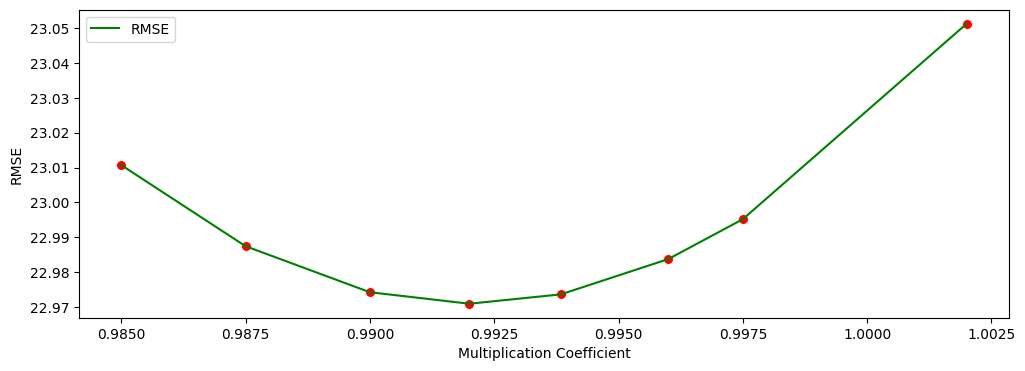

In [24]:
# Plotting the co-efficient effects

plt.figure(figsize=(12,4))
sns.lineplot(data=Accuracy_df, x='Multiplication Coefficient',y='RMSE',label='RMSE',color='g')
sns.scatterplot(data=Accuracy_df, x='Multiplication Coefficient',y='RMSE',color='r', markers=True,s=50)

## Authors:

[<b>Md. Mahbub Talukder,](https://www.linkedin.com/in/mahbub-talukder-a853a5184/)<br>
BSc. in Mechanical Engineering,<br>
Bangladesh University of Engineering and Technology, Bangladesh.

[<b>Musarrat Bintay Hossain,](https://www.linkedin.com/in/musarrat-hossain-b97948176/)<br>
BSc. in Computer Science and Technology<br>
Changsha University of Science and Technology, China. 